# Аналитика с применением ML. Обучение с учителем. Регрессия.
## Составить лучшие варианты бриллианта
<div style="text-align: center;">
    <img src="https://static.tildacdn.com/tild3336-3437-4638-b566-666236633564/unnamed_2.jpg" alt="Брилиант" width="400" height="400">
</div>

In [172]:
# Импортируем библиотеки
import pandas as pd # для работы с данными
import numpy as np # для вычислений
import matplotlib.pyplot as plt # для визулизаций
import seaborn as sns # для визулизаций

from sklearn import linear_model # Линейные модели
from sklearn import preprocessing # предобработка
from sklearn import metrics # метрики
from sklearn.model_selection import train_test_split # выборка
%matplotlib inline

Повторим, как организуется процесс разработки DS-проектов согласно методологии CRISP-DM.

Этапы модели CRISP-DM:
1. Анализ требований
2. Исследование данных
3. Подготовка данных
4. Моделирование
5. Оценка модели
6. Внедрение

### Анализ требований

Задание: Анализировать кейс и создать модель Регрессий для предсказывание цены бриланта.

**Знакомство с данными**

In [173]:
# Считываем данные из таблицы
df = pd.read_excel(r"C:\Users\moona\Desktop\Брилианты для Сары - project 5\data\data.xlsx")
df.set_index('ID', inplace=True) # устанавливаем колонку "ID" как индекс
df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
ID,,,,,,,,
1,1.10,Ideal,H,SI1,VG,EX,GIA,5169
2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
3,0.85,Ideal,H,SI1,EX,EX,GIA,3183
4,0.91,Ideal,E,SI1,VG,VG,GIA,4370
5,0.83,Ideal,G,SI1,EX,EX,GIA,3171


Каждый брилиант описывает следующие признаки:
1. Carat Weight - Вес в каратах
2. Cut - Огранка
3. Color - Цвет
4. Clarity - Чистота
5. Polish - Полировка
6. Symmetry - Симетрия
7. Report - Стандарты оценки
8. Price - Цена (**Целевая переменная**)

* Оценка брилиантов зависет от четерех основных критериев, известные как "Четыре С" - Carat Weight, Cut, Color, Clarity. Помимо этих факторов на стоимость камня могут также влиять другие, менее известные показатели, это - Polish, Symmetry, Report. (Подробно можете узнать в файле "task.pdf" в папке "description").

In [174]:
df.shape

(6000, 8)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1 to 6000
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 421.9+ KB


### Исследование данных

Цель этого шага — понять слабые и сильные стороны предоставленных данных, определить их достаточность, оценить взаимосвязи между признаками и предложить идеи, как их использовать.

Выводим описательные статистики для числовых и категориальных признаков

In [176]:
df.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


In [177]:
df.describe(include='object')

,Cut,Color,Clarity,Polish,Symmetry,Report
count,6000,6000,6000,6000,6000,6000
unique,5,6,7,4,4,2
top,Ideal,G,SI1,EX,VG,GIA
freq,2482,1501,2059,2425,2417,5266


In [195]:
# создаем копию для облегчения работы с таблицей
temp_data = df.copy()

Проведем небольшое исследование зависимости целевого признака price от числовых признаков.

In [196]:
types = temp_data.dtypes
num_features = list(types[types != 'object'].index)
num_features

['Carat Weight', 'Price']

Покажем визуализацией диаграмму рассеяния для числовых признаков. Дополнительно поверх диаграммы рассеяния построим уравнение линейной регрессии.

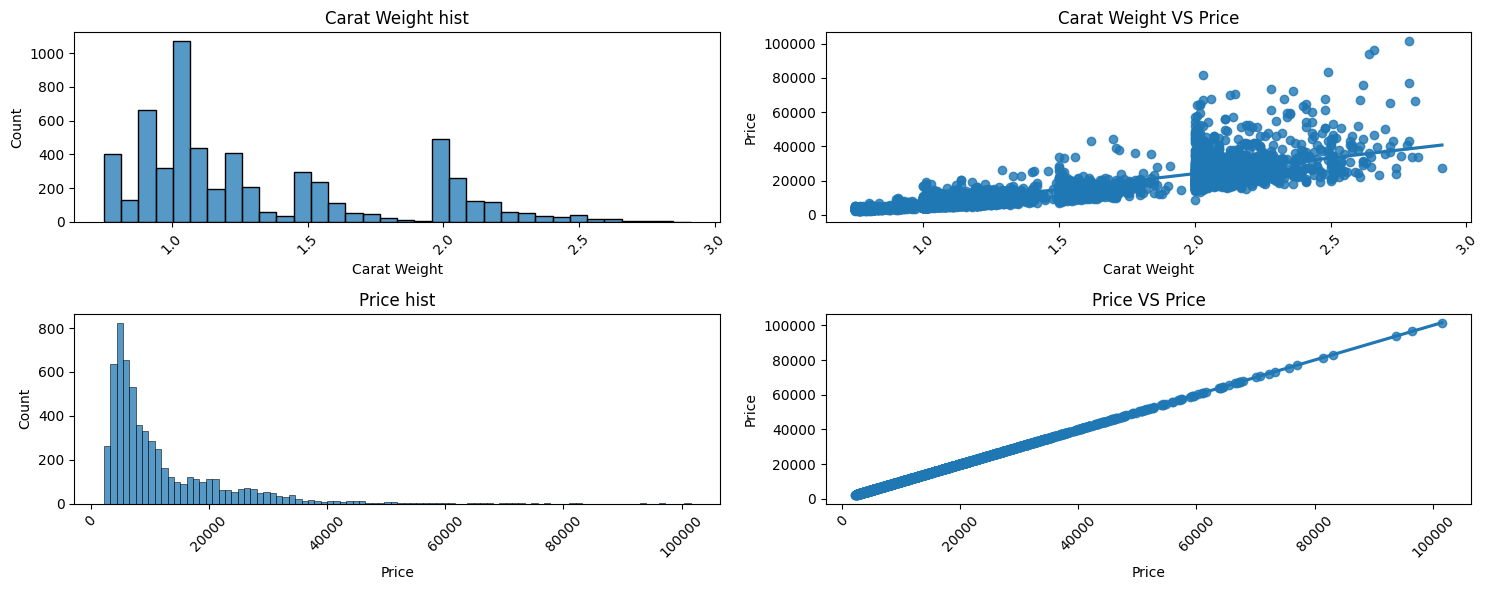

In [197]:
n = len(num_features) # количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 6))
for i, feature in enumerate(num_features):
    # Диаграмма рассеяния
    # Гистограмма рассейвания признака
    histplot = sns.histplot(data=temp_data, x = feature, ax=axes[i][0]) 
    # Подписываем
    histplot.set_title('{} hist'.format(feature))  
    # Поворот
    histplot.xaxis.set_tick_params(rotation=45)  
    
    # Диаграмма рассеяния + Уравнение регрессии
    # Уравнение регрессии отношение признака с целевой переменной
    regplot = sns.regplot(data=temp_data, x=feature, y='Price', ax=axes[i][1]) 
    # Подписываем
    regplot.set_title('{} VS Price'.format(feature)) 
    # Поворот
    regplot.xaxis.set_tick_params(rotation=45) 
plt.tight_layout() # выравнивание графиков

Строим тепловую карту для корреляционной матрицы, чтобы оценить мультиколлинеарную зависимость и линейную взаимосвязь между факторами и целевым признаком (price)

<Axes: >

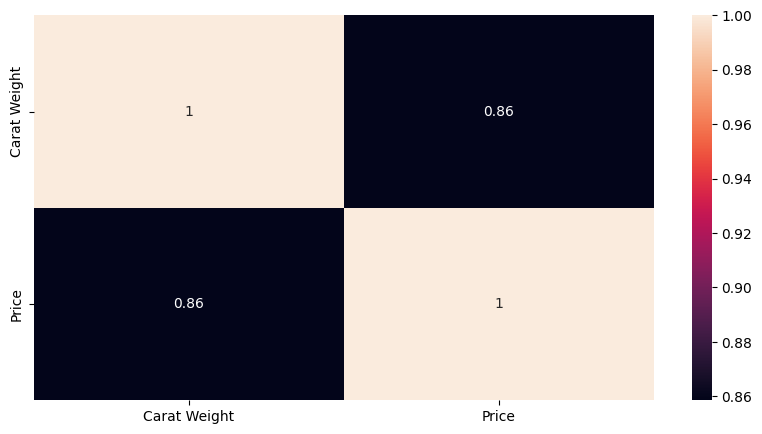

In [198]:
# Строим тепловую карту корреляций
fig = plt.subplots(figsize=(10, 5))
sns.heatmap(temp_data[num_features].corr(), annot=True)

### Подготовка данных

Цель этого этапа — подготовить обучающую выборку для использования в моделировании.

Модель: Регрессия

**Задачи:**
- Анализ дубликатов
- Анализ пустот
- Удаление выбросов
- Обработать числовые метрики
- Обработать категориальные метрики
- Удаление лишних переменных / уменьшение размерности (Итерация #2)

#### Анализ дубликатов

Выводим дубликаты с помощью функции duplicated() и удаляем их функцией drop_duplicates().

In [199]:
# Выводим дубликаты
temp_data[temp_data.duplicated()].shape

(83, 8)

In [200]:
# Удаляем дубликаты 
temp_data.drop_duplicates(inplace=True)
temp_data.shape

(5917, 8)

Были удалены 83 строк данных которые были дубликатами.

#### Анализ пустот

Для анализа пустот в данных используем isna()

In [201]:
# Выводим количество пустых ячеек из каждой колонки нашего датасета 
temp_data.isna().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

Пустые ячейки отсутствуют.

#### Удаление выбросов

Моя цель анализировать и удалить выбросы Целевой переменны('Price'), но у нас есть проблема в том что распределение не семетрично. Можете посмотреть решение проблемы внизу.

1 - Есть большие выбросы, ввиде длинного хвоста.

Из-за этого центральным значением выбираем медиану, а не среднюю. Потому что она не чуствительна к выбросам.

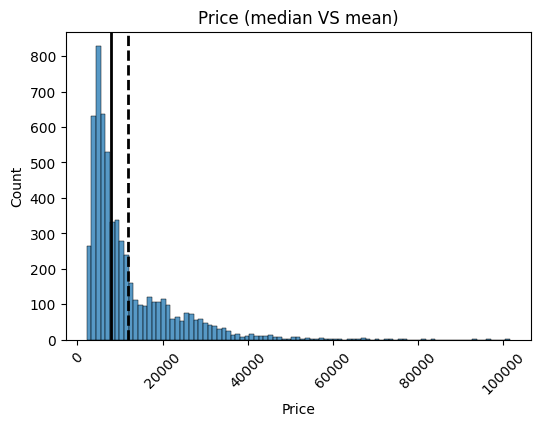

In [202]:
# Визуализируем разницу между медианой и средним
fig, _ = plt.subplots(1, 1, figsize=(6, 4))
histplot = sns.histplot(data=temp_data, x = 'Price')
histplot.xaxis.set_tick_params(rotation=45)
histplot.set_title('Price (median VS mean)')
_.axvline(temp_data['Price'].median(), color='k', lw=2)
_.axvline(temp_data['Price'].mean(), color='k', ls='--', lw=2)

А так же можно увидеть что медиана и 50 персентиль одинаковы.

In [203]:
# Медиана и 50 персентиль целевой переменны
print("Median = {}".format(temp_data['Price'].median()))
print("50 % = {}".format(np.percentile(temp_data['Price'], 50)))

Median = 7869.0
50 % = 7869.0


2 - Распределение не семетрично. Так что мы не можем использовать метод z-отклонений(3х сигм).

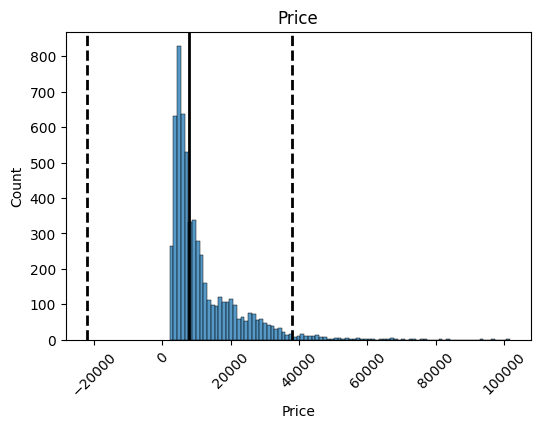

In [204]:
# Визуализирую ошибку по поводу 3 сигм.
fig, _ = plt.subplots(1, 1, figsize=(6, 4))
histplot = sns.histplot(data=temp_data, x = 'Price')
histplot.xaxis.set_tick_params(rotation=45)
histplot.set_title('Price')

per_25 = np.percentile(temp_data['Price'], 25)
per_75 = np.percentile(temp_data['Price'], 75)
iqr = per_75 - per_25

_.axvline(temp_data['Price'].median(), color='k', lw=2)
_.axvline(temp_data['Price'].median() + 3*iqr, 
          color='k', ls='--', lw=2)
_.axvline(temp_data['Price'].median() - 3*iqr, 
          color='k', ls='--', lw=2)

Здесь я хочу использовать **"Скорректированный интервал"**. 

Решение этой проблемы предложили Миа Хаберт и Елена Вандервирен (Mia Hubert and Ellen Vandervieren) в 2007 г. в статье “An Adjusted Boxplot for Skewed Distributions”. Их идея заключается в вычислении границ “интервал доверия” с учетом асимметрии распределения, но чтобы для симметричного случая он был равен всё тому же 1,5 * IQR.

[Ссылка на статью](https://www.sciencedirect.com/science/article/abs/pii/S0167947307004434)

#### Формула для удаления выбросов по Скорректированному интервалу

1. **Вычисление квартилей и межквартильного размаха (IQR):**

   $$
   Q_1 = \text{первый квартиль}
   $$
   $$
   Q_3 = \text{третий квартиль}
   $$
   $$
   \text{IQR} = Q_3 - Q_1
   $$

2. **Оценка плотности выбросов:**

   $$
   \hat{k} = \frac{(Q_3 - Q_2) - (Q_2 - Q_1)}{(Q_{3} - Q_{1})}
   $$

3. **Вычисление нижней и верхней границы:**

   Если $$\hat{k} >= 0:$$
      $$
      \text{Нижняя граница} = Q_1 - 1.5 \times e^{-4\hat{k}} \times \text{IQR}
      $$
      $$
      \text{Верхняя граница} = Q_3 + 1.5 \times e^{3\hat{k}} \times \text{IQR}
      $$
   
   Иначе:
      $$
      \text{Нижняя граница} = Q_1 - 1.5 \times e^{-3\hat{k}} \times \text{IQR}
      $$
      $$
      \text{Верхняя граница} = Q_3 + 1.5 \times e^{4\hat{k}} \times \text{IQR}
      $$
   
   

Эти формулы помогают определить нижнюю и верхнюю границы для удаления выбросов. Данные, которые находятся за пределами этих границ, считаются выбросами.


k = 0.45547430632074526
lower_bound = 2729.3441803770206
upper_bound = 73853.4884992619


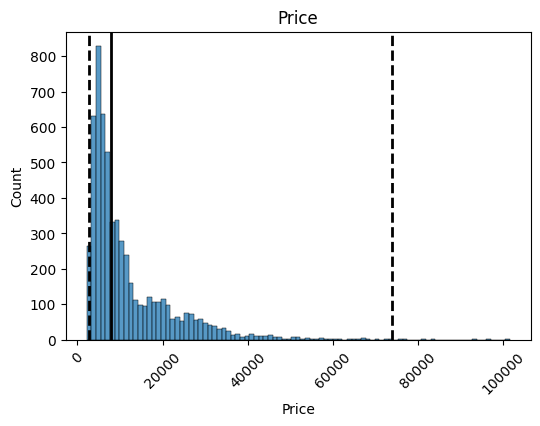

In [205]:
# Создаем функцию для метода "Скорректированный интервал"
def adjusted_interval_price(temp_data):
    q2 = np.percentile(temp_data['Price'], 50)
    q1 = np.percentile(temp_data['Price'], 25)
    q3 = np.percentile(temp_data['Price'], 75)
    iqr = q3 - q1

    k = ((q3 - q2) - (q2 - q1))/(q3 - q1)
    print(f"k = {k}")

    if k >= 0:
        lower_bound = q1 - 1.5 * (np.pow(np.e, (-4 * k))) * iqr
        upper_bound = q3 + 1.5 * (np.pow(np.e, (3 * k))) * iqr
    else:
        lower_bound = q1 - 1.5 * (np.pow(np.e, (-3 * k))) * iqr
        upper_bound = q3 + 1.5 * (np.pow(np.e, (4 * k))) * iqr
    
    return lower_bound, upper_bound

# Считываем нижнюю и верхнюю границу
lower_bound, upper_bound = adjusted_interval_price(temp_data)

# Визуализируем результат
fig, _ = plt.subplots(1, 1, figsize=(6, 4))
histplot = sns.histplot(data=temp_data, x = 'Price')
histplot.xaxis.set_tick_params(rotation=45)
histplot.set_title('Price')

_.axvline(temp_data['Price'].median(), color='k', lw=2)
_.axvline(lower_bound, 
          color='k', ls='--', lw=2)
_.axvline(upper_bound, 
          color='k', ls='--', lw=2)

print(f"lower_bound = {lower_bound}")
print(f"upper_bound = {upper_bound}")

In [206]:
# Before
temp_data.shape

(5917, 8)

In [207]:
lower_bound = int(lower_bound)
upper_bound = int(upper_bound)
print(f"lower bound = {lower_bound}")
print(f"upper bound = {upper_bound}")

lower bound = 2729
upper bound = 73853


In [208]:
# Удаляем выбросы
temp_data = temp_data[(temp_data['Price'] > lower_bound) & (temp_data['Price'] < upper_bound)].copy()

In [209]:
temp_data['Price'].describe()

count     5846.000000
mean     11827.199111
std       9880.120218
min       2734.000000
25%       5211.250000
50%       7958.500000
75%      15266.250000
max      73209.000000
Name: Price, dtype: float64

In [210]:
# After
temp_data.shape

(5846, 8)

#### Обработать числовые метрики

У нас есть только одна числовая метрика кроме целевой это **'Carat Weight'**. Поэтому думаю что статистические методы как нормализация или стартизация не требуеться.

У этой переменной три модальное распределение. Это было бы проблемой если у нас бы были другие числовые метрики.

In [211]:
# Описательная статистика 'Carat Weight'
temp_data['Carat Weight'].describe()

count    5846.000000
mean        1.340274
std         0.473938
min         0.750000
25%         1.010000
50%         1.140000
75%         1.600000
max         2.910000
Name: Carat Weight, dtype: float64

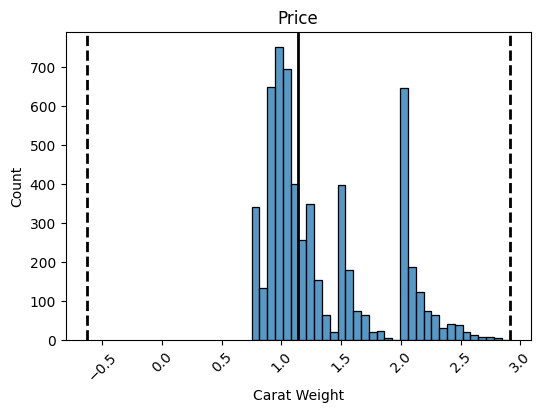

In [212]:
# Визуализирую 3 сигм по Carat Weight.
fig, _ = plt.subplots(1, 1, figsize=(6, 4))
histplot = sns.histplot(data=temp_data, x = 'Carat Weight')
histplot.xaxis.set_tick_params(rotation=45)
histplot.set_title('Carat Weight')

per_25 = np.percentile(temp_data['Carat Weight'], 25)
per_75 = np.percentile(temp_data['Carat Weight'], 75)
iqr = per_75 - per_25

_.axvline(temp_data['Carat Weight'].median(), color='k', lw=2)
_.axvline(temp_data['Carat Weight'].median() + 3*iqr, 
          color='k', ls='--', lw=2)
_.axvline(temp_data['Carat Weight'].median() - 3*iqr, 
          color='k', ls='--', lw=2)

Я пока оставляю эту метрику как есть. Ничего не меняю.

#### Обработать категориальные метрики

Произведем One Hot-кодирование категориальных признаков с помощью функции pandas - get_dummies().

In [213]:
#Производим кодирование категориальных признаков
dummies_data = pd.get_dummies(temp_data)
dummies_data.head()

,Carat Weight,Price,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,...,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_AGSL,Report_GIA
ID,,,,,,,,,,,,,,,,,,,,,
1,1.10,5169,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
2,0.83,3470,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
3,0.85,3183,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
4,0.91,4370,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
5,0.83,3171,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True


Аналог: знакомый нам OneHotEncoder из библиотеки category_encoders

In [214]:
# import category_encoders as ce # импорт для работы с кодировщиком

# encoder = ce.OneHotEncoder(cols=['Cut', 'Color', 'Clarity', 'Polish', 
#                                  'Symmetry', 'Report']) # указываем столбец для кодирования
# encoding_data = encoder.fit_transform(temp_data[['Cut', 'Color', 'Clarity', 'Polish', 
#                                  'Symmetry', 'Report']])
# dummies_data = pd.concat([temp_data.drop(['Cut', 'Color', 'Clarity', 'Polish', 
#                                  'Symmetry', 'Report'], axis=1), encoding_data], axis=1)
# dummies_data.head()

#### Разделение на train и test

Разделим набор данных на матрицу наблюдений X (таблица из объектов и их признаков) и столбец правильных ответов y

In [215]:
#X - матрица наблюдений, y - столбец правильных ответов
X = dummies_data.drop('Price', axis=1)
y = dummies_data['Price']

Разделяем всю выборку на тренировочную и тестовую в соотношении 80/20.

На тренировочной выборке будем обучать модели, а на тестовой проверять их качество.

In [216]:
#Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, #таблица с наблюдениями и столбец с правильным ответами
    test_size=0.2, #размер тестовой выборки
    random_state=42 #число отвечающее за генерацию случайных чисел
)
#Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (4676, 29)
Test shape: (1170, 29)


### Моделирование + Оценка модели

Цель этапа - построить модель, решающую поставленную задачу и оценить ее качество

Заранее создадим функцию, которая будет расчитывать метрики:

* MAE - средняя абсолютная ошибка (целевая метрика)
* MAPE - средняя абсолютная ошибка в процентах
* $R^2$ - коэффициент детерминации
* MSE - Среднеквадратическая ошибка

In [217]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MSE: {:.3f}'.format(metrics.mean_squared_error(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MSE: {:.3f}'.format(metrics.mean_squared_error(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

**Модель линейной регрессии:** 

Модель линейной регрессии имеет следующий вид:

$$\widehat{y_i} = w_0 + \sum_{j=1}^m w_j x_{ij}$$

где $x_{ij}$ — объект из $i$-ой строки и $j$-ого столбца из таблицы объектов-признак $X$, $y_i$ — правильный ответ, соответствующий $x_{i}$, $\\omega$ — параметры линейной регрессии

Для поиска параметров модели используется схема минизации эмпиричного риска - ищутся такие параметры $\omega$, при которых функция ошибки $L(\omega)$ была бы минимальна. 

В качестве функции потерь используем MSE - средний квадрат ошибки.

$$L(\omega) = MSE = \frac{1}{n} * \sum_{i=1}^{n}{(y_i - \widehat{y_i})^2} \Rightarrow min_\omega $$

В библиотеке sklearn линейная регрессия с поиском параметров по OLS реализована в классе LinearRegression модуля linear_model.

Методы:
* fit() - подгонка параметров по OLS (обучение модели)
* predict() - предсказание (подстановка наблюдения $x_i$ в модель и получение ответа для каждого наблюдения)

Атрибуты:
* coef_ - найденные с помощью OLS коэффициенты $\omega_1, \omega_2,$ ...,$ \omega_m$ (в виде вектора)
* intercept_ - свободный член $\omega_0$

In [218]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.870
Train MSE: 12919490.880
Train MAE: 2394.531
Train MAPE: 27.303


Test R^2: 0.878
Test MSE: 11165413.380
Test MAE: 2257.929
Train MAPE: 25.480


Text(0.5, 1.0, 'Price Test Residue')

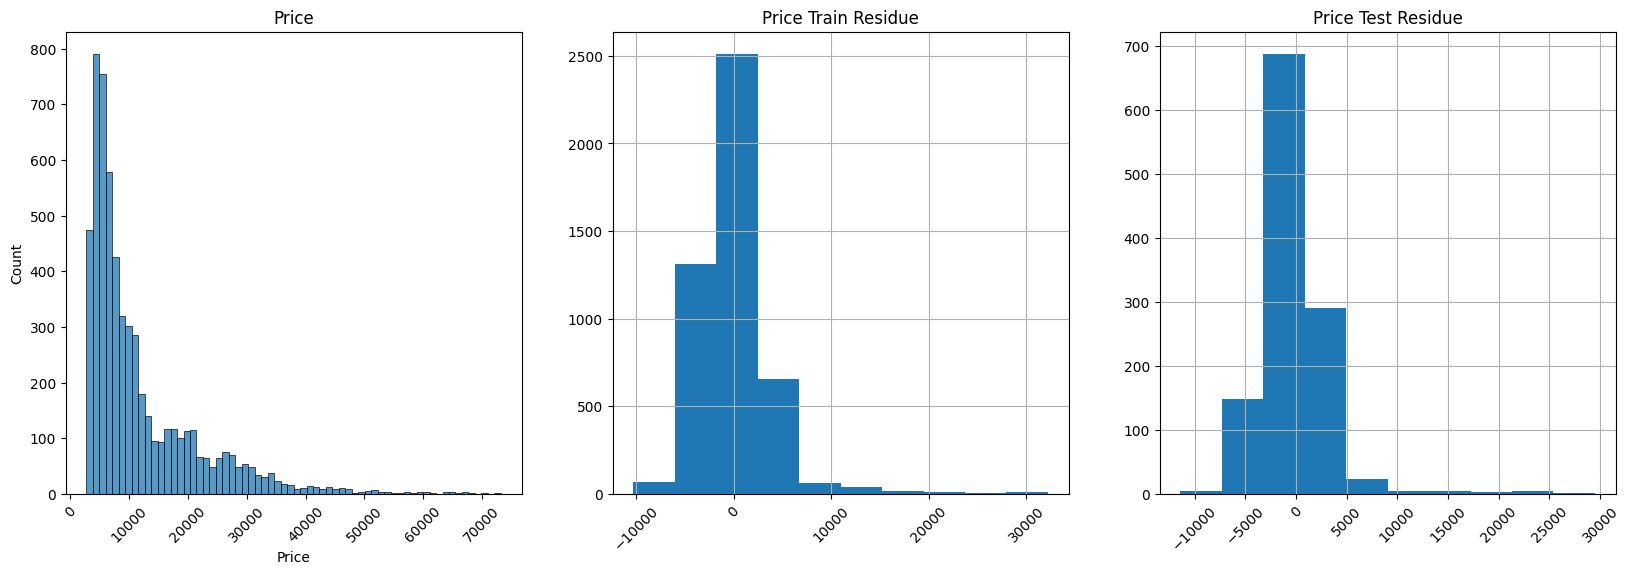

In [219]:
# Визуализируем Целевую переменную (Price)
fig, axis = plt.subplots(1, 3, figsize=(20, 6))
# Распределение Price
price_histplot = sns.histplot(data=temp_data, x = 'Price', ax=axis[0])
price_histplot.xaxis.set_tick_params(rotation=45)
price_histplot.set_title('Price')
# Распределение остатка по y_train
price_train_residue_histplot = (y_train - y_train_predict).hist(ax=axis[1])
price_train_residue_histplot.xaxis.set_tick_params(rotation=45)
price_train_residue_histplot.set_title('Price Train Residue')
# Распределение остатка по y_test
price_test_residue_histplot = (y_test - y_test_predict).hist(ax=axis[2])
price_test_residue_histplot.xaxis.set_tick_params(rotation=45)
price_test_residue_histplot.set_title('Price Test Residue')

**Целевая переменная имеет очень большой хвост и является несимметричной** 

Чтобы улучшить модель я собираюсь преоброзовать целевую переменную (**Price**), то есть логарифмировать её. Потому что целевая переменная имеет очень большой отрезок(range) и шумы. А после логарифмирования отрезок снизелся, вместе с этим и снизилась ошибка.

[Ссылка на статью](https://habr.com/ru/articles/574092/)

In [220]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#создаем логарифмированный целевой признак цены
y_train_log = np.log(y_train)
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train_log)
#Делаем предсказание для каждой из выборок
y_train_predict_log = np.exp(lr.predict(X_train))
y_test_predict_log = np.exp(lr.predict(X_test))
#Выводим результирующие метрики
print_metrics(y_train, y_train_predict_log, y_test, y_test_predict_log)

Train R^2: 0.910
Train MSE: 8930086.527
Train MAE: 1416.088
Train MAPE: 11.087


Test R^2: 0.890
Test MSE: 10039949.094
Test MAE: 1488.354
Train MAPE: 11.540


Text(0.5, 1.0, 'Price Test Residue')

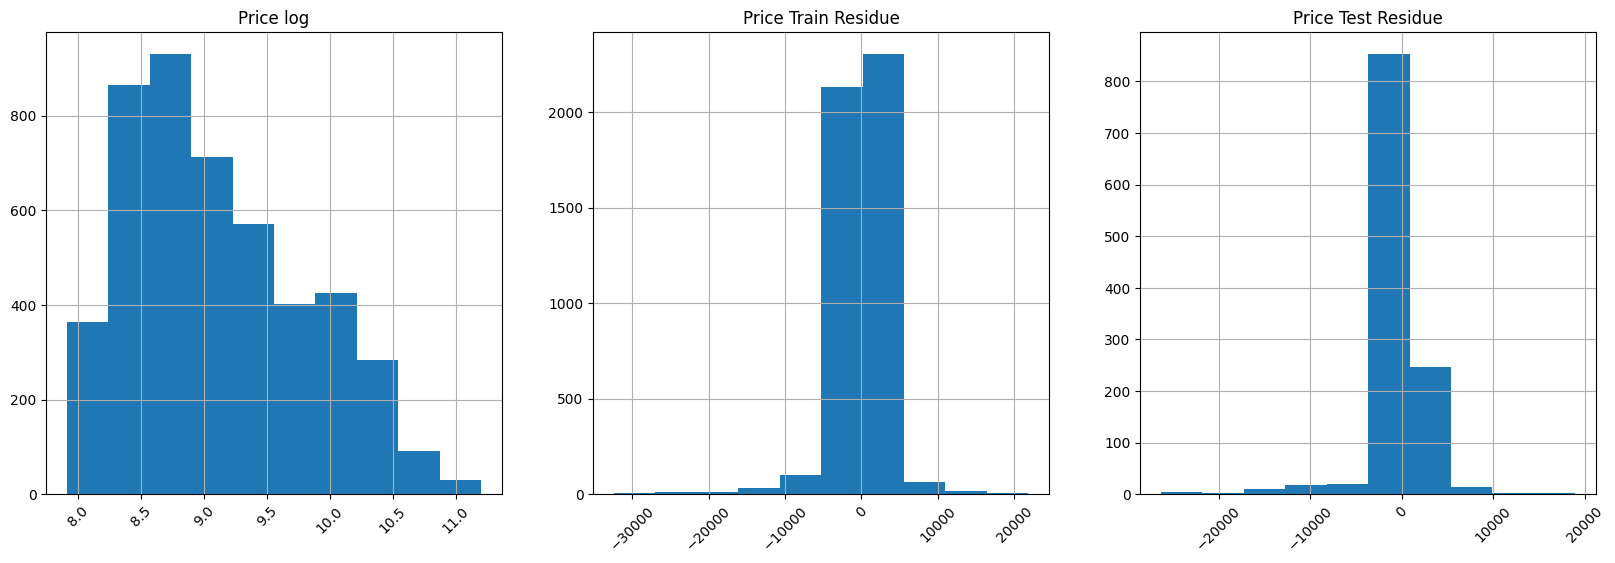

In [221]:
# Визуализируем логарифмированную Целевую переменную (Price log)
fig, axis = plt.subplots(1, 3, figsize=(20, 6))
# Распределение y_train_log
price_log_histplot = y_train_log.hist(ax=axis[0])
price_log_histplot.xaxis.set_tick_params(rotation=45)
price_log_histplot.set_title('Price log')
# Распределение остатка по y_train
price_train_residue_histplot = (y_train - y_train_predict_log).hist(ax=axis[1])
price_train_residue_histplot.xaxis.set_tick_params(rotation=45)
price_train_residue_histplot.set_title('Price Train Residue')
# Распределение остатка по y_test
price_test_residue_histplot = (y_test - y_test_predict_log).hist(ax=axis[2])
price_test_residue_histplot.xaxis.set_tick_params(rotation=45)
price_test_residue_histplot.set_title('Price Test Residue')

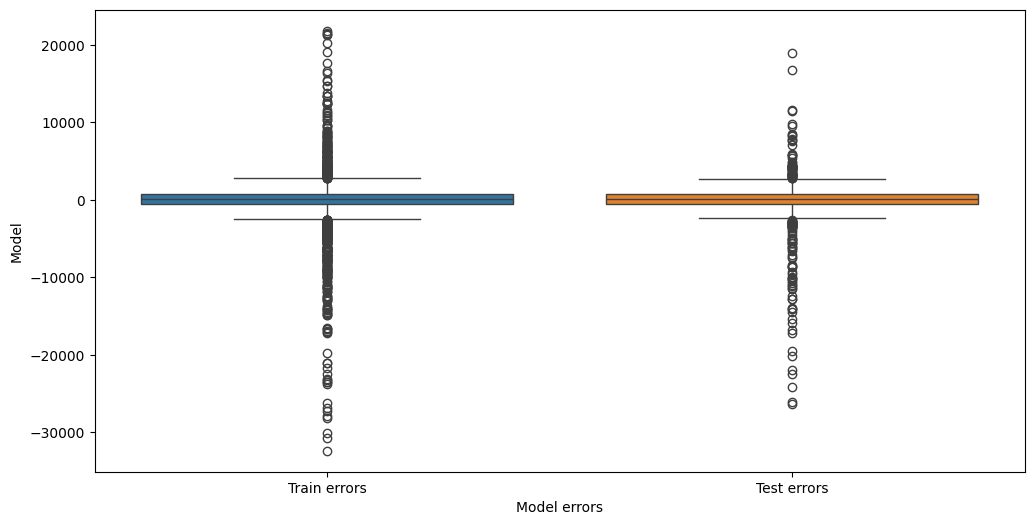

In [222]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - y_train_predict_log
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_predict_log
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

#### Возможные дальнейшие шаги по улучшению:

* Нужно подобрать нужный нам коэффицент в "Скорректированный интервал", то есть удалить больше выбросов.
    * Я попробовал поставить 0,9 вместо 1,5 это улучшило модель по метрике $R^2$ до 0,92 на тесте. Но не хотел бездумно удалять данные.

* Попытаться поделить на bins числовой признак "Carat Weight".
    
* Попробывать Удалить не нужные признаки.